In [1]:
import numpy as np
np.set_printoptions(threshold=np.nan)

from astropy.io import fits
from astropy.units import degree, kpc
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS

import plotly
from plotly.offline import plot, iplot
import plotly.graph_objs as go

from matplotlib import pyplot as plt

In [2]:
data = fits.open('delta_transmission_RMplate.fits')
len(data)

1247

### Data Model

**PrimaryHDU**

In [3]:
data[0]

In [4]:
data[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 

**BinaryTableHDU**

In [5]:
data[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                   24 / width of table in bytes                        
NAXIS2  =                 3466 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    3 / number of fields in each row                   
TTYPE1  = 'LAMBDA  '           / label for field   1                            
TFORM1  = 'D       '           / data format of field: 8-byte DOUBLE            
TUNIT1  = 'Angstrom'           / physical unit of field                         
TTYPE2  = 'DELTA_T '           / label for field   2                            
TFORM2  = 'D       '        

In [6]:
data[1].data.shape

(3466,)

In [7]:
data[1].data['LAMBDA'][:10]

array([ 4506.6,  4506.8,  4507. ,  4507.2,  4507.4,  4507.6,  4507.8,
        4508. ,  4508.2,  4508.4])

In [8]:
data[1].data['DELTA_T'][:10]

array([ 0.32041982,  0.32820452,  0.32227549,  0.30720392,  0.32257604,
        0.37425373,  0.41448467,  0.43779907,  0.44572165,  0.42081868])

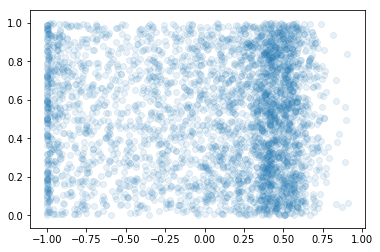

In [9]:
plt.scatter(data[1].data['DELTA_T'], np.random.rand(data[1].data.shape[0]), alpha=0.1)
plt.show()

In [10]:
data[1].data['RCOMOV'][:10]

array([ 4181.91557086,  4182.03612559,  4182.15668033,  4182.27723506,
        4182.3977898 ,  4182.51834453,  4182.63887691,  4182.75938488,
        4182.87989285,  4183.00040082])

## 2D Visualization

In [11]:
def plotting3d(x, y, z):
    trace = go.Scatter3d(
        x=x,
        y=x,
        z=z,
        mode='markers',
        marker=dict(
            size=5,
            opacity=0.5
        )
    )
    layout = go.Layout(
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        )
    )
    fig = go.Figure(data=[trace], layout=layout)
    return fig

### Extracting Coordinates from Header

In [12]:
ra_list = []
for i in range(1, len(data)):
    ra_list.append(data[i].header['RA'])
ras = np.array(ra_list)
ras.shape

(1246,)

In [13]:
dec_list = []
for i in range(1, len(data)):
    dec_list.append(data[i].header['DEC'])
decs = np.array(dec_list)
decs.shape

(1246,)

In [14]:
z_list = []
for i in range(1, len(data)):
    z_list.append(data[i].header['Z'])
zs = np.array(z_list)
zs.shape

(1246,)

### Building Coordinate Systems

In [15]:
quasar_2d = SkyCoord(ra=ras*degree, dec=decs*degree, distance=zs*kpc, frame='icrs')
quasar_2d.shape

(1246,)

###  Astronomical Coordinate Systems - Equatorial

In [16]:
ra = quasar_2d[:].ra.value

In [17]:
dec = quasar_2d[:].dec.value

In [18]:
dis1 = quasar_2d[:].distance.value

In [19]:
rel_dis1 = dis1/dis1.max()

In [20]:
color1 = np.zeros((quasar_2d.shape[0], 4))
color1[:,3] = rel_dis1

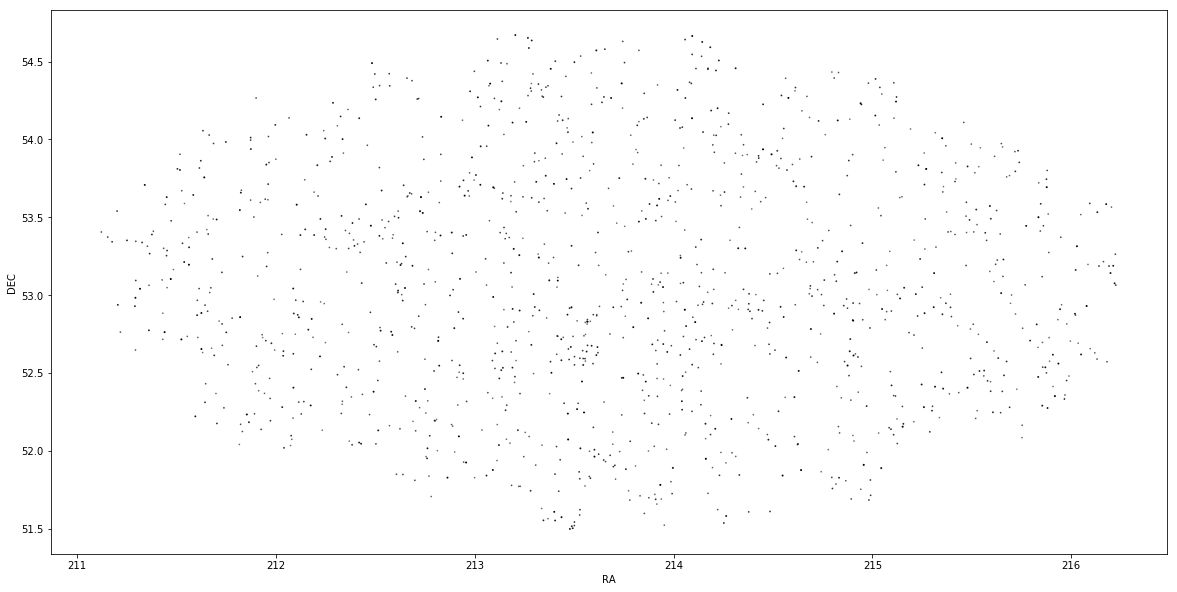

In [21]:
plt.figure(figsize=(20,10))
plt.scatter(ra, dec, s=rel_dis1, c=color1)
# plt.scatter(lon2, lat2, s=0.5, c='k')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.show()

In [22]:
plot(plotting3d(ra,dec,dis1), filename='2dEquatorial')

/Applications/anaconda3/lib/python3.6/site-packages/plotly/offline/offline.py:463: UserWarning:

Your filename `2dEquatorial` didn't end with .html. Adding .html to the end of your file.



'file:///Users/yulong/Codes/astro-void/2dEquatorial.html'

###  Astronomical Coordinate Systems - Galactic

In [23]:
quasar_galactic = quasar_2d.galactic
quasar_galactic.shape

(1246,)

In [24]:
lon = quasar_galactic[:].l.value

In [25]:
lat = quasar_galactic[:].b.value

In [26]:
dis2 = quasar_galactic[:].distance.value

In [27]:
rel_dis2 = dis2/dis2.max()

In [28]:
color2 = np.zeros((quasar_galactic.shape[0], 4))
color2[:,3] = rel_dis2

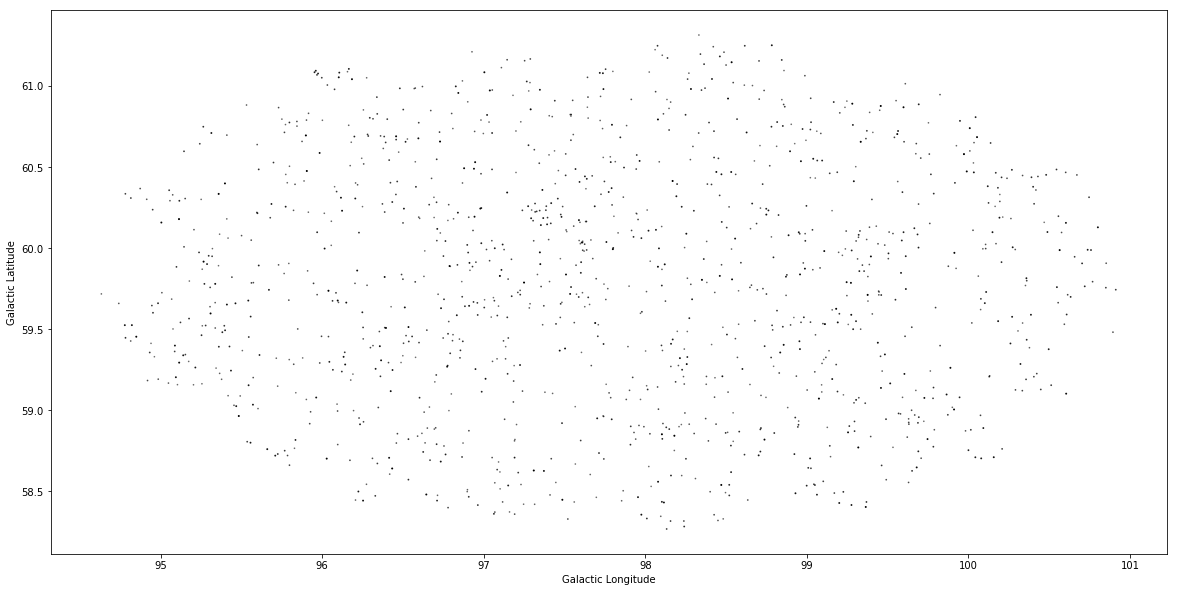

In [29]:
plt.figure(figsize=(20,10))
plt.scatter(lon, lat, s=rel_dis2, c=color2)
# plt.scatter(lon2, lat2, s=0.5, c='k')
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')
plt.show()

In [30]:
plot(plotting3d(lon,lat,dis2), filename='2dGalactic')

/Applications/anaconda3/lib/python3.6/site-packages/plotly/offline/offline.py:463: UserWarning:

Your filename `2dGalactic` didn't end with .html. Adding .html to the end of your file.



'file:///Users/yulong/Codes/astro-void/2dGalactic.html'

### Cartesian Coordinate System

In [31]:
quasar_cartesian = quasar_2d.cartesian
quasar_cartesian.shape

(1246,)

In [32]:
quasar_cartesian[0]

<CartesianRepresentation (x, y, z) in kpc
    (-1.72561401, -1.08562987,  2.63694879)>

In [33]:
x = quasar_cartesian[:].x.value

In [34]:
y = quasar_cartesian[:].y.value

In [35]:
z = quasar_cartesian[:].z.value

In [36]:
rel_z = z/z.max()

In [37]:
color3 = np.zeros((quasar_cartesian.shape[0], 4))
color3[:,3] = rel_z

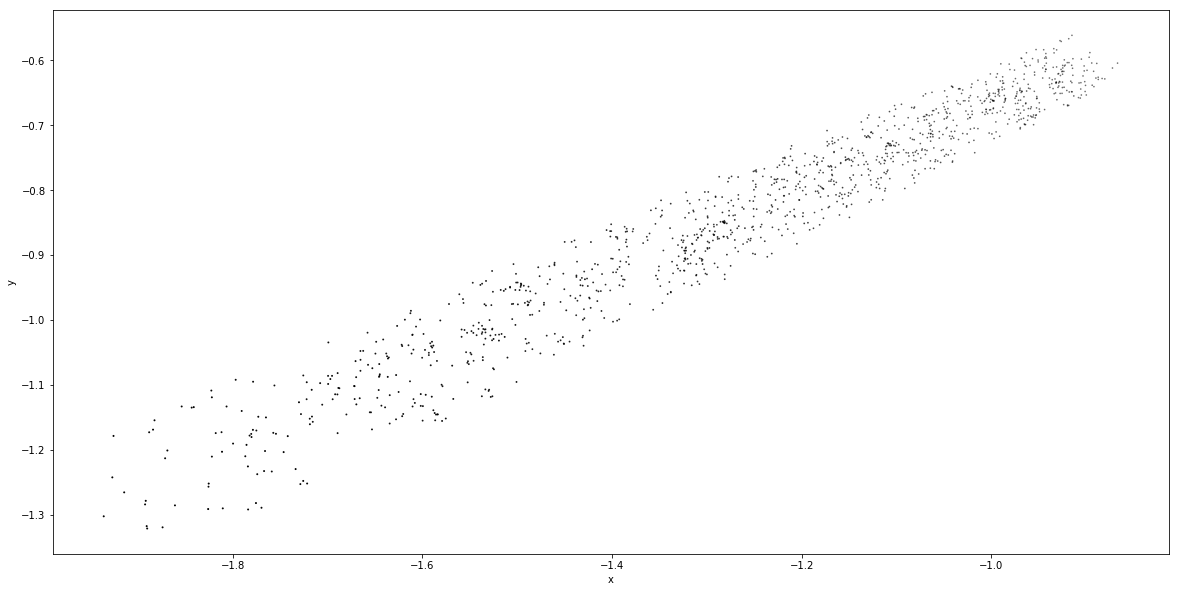

In [38]:
plt.figure(figsize=(20,10))
plt.scatter(x, y, s=rel_z, c=color3)
# plt.scatter(lon2, lat2, s=0.5, c='k')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [39]:
plot(plotting3d(x,y,z), filename='2dCartesian')

/Applications/anaconda3/lib/python3.6/site-packages/plotly/offline/offline.py:463: UserWarning:

Your filename `2dCartesian` didn't end with .html. Adding .html to the end of your file.



'file:///Users/yulong/Codes/astro-void/2dCartesian.html'

## 3D Visualization

In [40]:
def GetSkyCoord(data):
    ra = data.header['RA']
    dec = data.header['DEC']
    depth = data.data['RCOMOV']
    field = data.data['DELTA_T']
    sc = SkyCoord(ra=ra*degree, dec=dec*degree, distance=depth*kpc, frame='icrs')
    return sc

In [41]:
def GetField(data):
    return data.data['DELTA_T']

In [42]:
def Filter(sc, field, threshold=None):
    if threshold == None:
        return sc, field
    idx = field > threshold
    newField = field[idx]
    newSC = sc[idx]
    return newSC, newField

In [43]:
data3d = []
threshold = -1

In [44]:
for i in range(1, len(data)):
    sc = GetSkyCoord(data[i])
    field = GetField(data[i])
    newSC, newField = Filter(sc, field, threshold)
    cart = newSC.cartesian
    trace = go.Scatter3d(
        x=cart[:].x.value,
        y=cart[:].y.value,
        z=cart[:].z.value,
        mode='markers',
        marker=dict(
            size=5,
            color=field,
            opacity=0.5
        )
    )
    data3d.append(trace)

In [45]:
layout3d = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)

In [46]:
fig = go.Figure(data=data3d, layout=layout3d)

In [47]:
plot(fig, filename='3dCartesian')

/Applications/anaconda3/lib/python3.6/site-packages/plotly/offline/offline.py:463: UserWarning:

Your filename `3dCartesian` didn't end with .html. Adding .html to the end of your file.



'file:///Users/yulong/Codes/astro-void/3dCartesian.html'